<a href="https://colab.research.google.com/github/hussain0048/Water-borne-diseases/blob/main/Watern_Brone_Disease_3_23_21_(Malaria)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://colab.research.google.com/drive/16RuGVxgCercSOghBqECW-Dz_DOEFd_t6#scrollTo=BwlGIq-fgExg">What is Fake news</a></li>
        <li><a href="#downloading_data">Aim</a></li>
        <li><a href="#pre-processing">Prerequisites</a></li>
        <li><a href="#setting_up_tree">Importing libraries</a></li>
        <li><a href="#modeling">Processing</a></li>
        <li><a href="#prediction">Building the model</a></li>
        <li><a href="#evaluation">Making Predictions for test data</a></li>
    </ol>
</div>
<br>
<hr>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1- What is Fake news?**
Fake news is false or misleading information presented as news. It often aims to damage the reputation of a person or entity or make money through advertising revenue. However, the term does not have a fixed definition and has been applied more broadly to include any type of false information, including unintentional and unconscious mechanisms, and also by high-profile individuals to apply to any news unfavorable to his/her personal perspectives.

# **2- Aim**

To develop a Fake News Classifier using Bidirectional Long Short Term Memory (LSTM) using Python programming Language and Keras on Cainvas Platform.

# **3- Prerequisites**

Before getting started, you should have a good understanding of:
- Python programming language
- Keras — Deep learning library



#**4-Importing libraries**

In [2]:
import pandas as pd
from keras.layers import Embedding
from keras.layers import Embedding
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# **5-Dataset**

we are going to use the train.csv dataset to train the model and then we do predictions for the test.csv dataset.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Fake News/train.csv')
df.head()

#**3-Processing**


## 3.2- **drop the nan values**

In [13]:
df=df.dropna()

##**3.3- load X and y with Independent and dependent features:**

In [14]:
# Class count
count_class_0, count_class_1 = df.label.value_counts()

# Divide by class
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]

# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print(df_test_over.label.value_counts())

X = df_test_over.drop('label',axis='columns')
y = df_test_over['label']

1    10361
0    10361
Name: label, dtype: int64


In [ ]:
X

In [ ]:
y

##**One-hot Representation:**

Vocabulary size:


In [15]:
# Vocabulary size
voc_size=30

Getting a copy of Independent features:


In [16]:
X_copy=X.copy()
X_copy.reset_index(inplace=True)

In [17]:
X_copy

,index,id,title,author,text
0,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
1,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
2,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
3,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
4,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
...,...,...,...,...,...
20717,20223,20223,Comment on Understanding Misleading Food Label...,Understanding Misleading Food Labels: An Infog...,Share on Facebook Share on Twitter “Let food b...
20718,1877,1877,SIXTY KILLED IN NEW US-SAUDI WAR CRIME IN YEMEN,Iron Sheik,Home › WORLD NEWS › SIXTY KILLED IN NEW US-SAU...
20719,6730,6730,"Pentagon Say $6.5 Trillion Dollars Is Missing,...",Starkman,The Pentagon cannot account for $6.5 trillion ...
20720,12002,12002,Blum’s Anti-Empire Report: A collection of tho...,shorty,The Anti-Empire Report #146 By William Blum – ...


Downloading stopwords:


In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

we are using nltk’s stopwords method to remove stopwords from our data, NumPy for array operations, and pandas to process data.

Dataset Preprocessing:


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(X_copy)):
 review = re.sub('[^a-zA-Z]', ' ', X_copy['title'][i])
 review = review.lower()
 review = review.split()
 
 review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
 review = ' '.join(review)
 corpus.append(review)
corpus

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

Embedding Representation:

In [21]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
embedded_docs[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  2, 29,
        7, 11, 22], dtype=int32)

#**4- Building the model:**

In [ ]:
mbedding_vector_features=40
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Dropout(0.7))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.7))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())


In [23]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42, stratify=y)

here we use sklearn.model_selection package to split the data into train data and test data

**Training Model:**


## **4.1 Training Model:**

In [26]:
history = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
217/217 [==============================] - 8s 37ms/step - loss: 0.2807 - accuracy: 0.8973 - val_loss: 0.2726 - val_accuracy: 0.8997
Epoch 2/10
217/217 [==============================] - 8s 37ms/step - loss: 0.2826 - accuracy: 0.8962 - val_loss: 0.2673 - val_accuracy: 0.9014
Epoch 3/10
217/217 [==============================] - 8s 37ms/step - loss: 0.2776 - accuracy: 0.8983 - val_loss: 0.2690 - val_accuracy: 0.9012
Epoch 4/10
217/217 [==============================] - 8s 37ms/step - loss: 0.2749 - accuracy: 0.8998 - val_loss: 0.2638 - val_accuracy: 0.9029
Epoch 5/10
217/217 [==============================] - 8s 37ms/step - loss: 0.2733 - accuracy: 0.8982 - val_loss: 0.2656 - val_accuracy: 0.9013
Epoch 6/10
217/217 [==============================] - 8s 37ms/step - loss: 0.2773 - accuracy: 0.9000 - val_loss: 0.2633 - val_accuracy: 0.9042
Epoch 7/10
217/217 [==============================] - 8s 37ms/step - loss: 0.2681 - accuracy: 0.9021 - val_loss: 0.2638 - val_accuracy: 0.9039

## 4.2-**Predicting and Heat Map:**

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/Datasets/Fake News/test.csv')


Text(69.0, 0.5, 'actual')

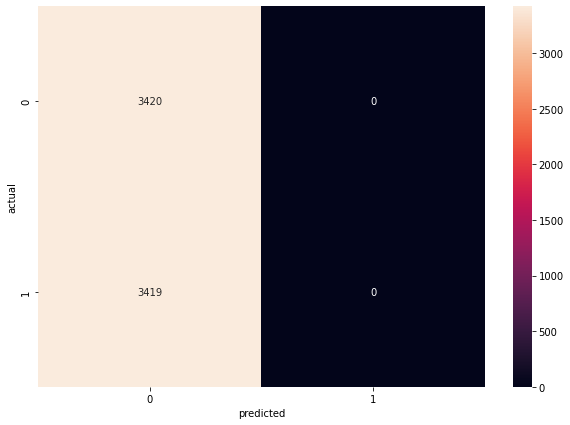

In [29]:
#y_pred1=model1.predict_classes(X_test)

predict_x=model1.predict(X_test) 
y_pred1=np.argmax(predict_x,axis=1)


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

import seaborn as sns
from matplotlib import pyplot as plt
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred1)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("actual")

## **4.3-Accuracy of the Model:**

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.5000731101038164

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3420
           1       0.00      0.00      0.00      3419

    accuracy                           0.50      6839
   macro avg       0.25      0.50      0.33      6839
weighted avg       0.25      0.50      0.33      6839



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5-**Making Predictions for test data:**

## **5.1- Loading the test data:**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/Fake News/test.csv')

df_test = df_test.reset_index(drop=True)
df_test1=np.array(embedded_docs)

df_test.head()

In [34]:
#y_pred2=model1.predict_classes(df_test1)
predict_x=model1.predict(df_test1) 
y_pred2=np.argmax(predict_x,axis=1)

## **5.2-Joining the test data and predicted labels:**

In [35]:
y_pred2 = pd.DataFrame(y_pred2, columns=['lables'])
df_final_0 = pd.concat([df_test['id'], y_pred2], axis = 1)
df_final_0.to_csv('Predictions')
df_final_0.head(10)

,id,lables
0,20800.0,0
1,20801.0,0
2,20802.0,0
3,20803.0,0
4,20804.0,0
5,20805.0,0
6,20806.0,0
7,20807.0,0
8,20808.0,0
9,20809.0,0


#**References**

[Fake News Classifier using Bidirectional LSTM](https://medium.com/ai-techsystems/fake-news-classifier-using-bidirectional-lstm-cebef77b0adc)